# z0

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
import scipy.misc

def KMeans(K,X):
    d,N = X.shape
    change = True
    R = X[:,np.random.randint(0,N,K)]
    M = np.zeros((N, K))
    while change:
        dists = -2 * ( X.T @ R) + np.sum(R ** 2, axis=0, keepdims=True)
        m = np.argmin(dists, axis =1)
        M2 = np.take(np.eye(K), m, axis=0).astype(int)
        change = not np.array_equal(M,M2)
        M = M2
        R = np.dot(X,M)/np.maximum(np.sum(M.T,axis=1),1)
    return R, m
    

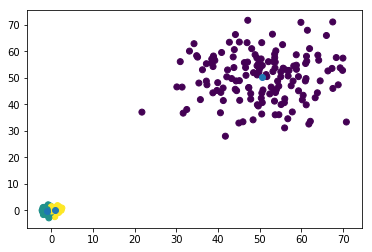

In [2]:
x = np.zeros((2,250))
x[:,:50] = np.random.randn(2,50)
x[:,50:100] = np.random.randn(2,50)
x[:,100:] = np.random.randn(2,150)*10+ 50
# x = x.T
# KMeans(3,x)

R,m = KMeans(3,x)
plt.scatter(x[0], x[1], c=m)
plt.scatter(R[0],R[1])




[[5.00555556 5.85       6.81956522]
 [0.30185185 1.452      1.97608696]]


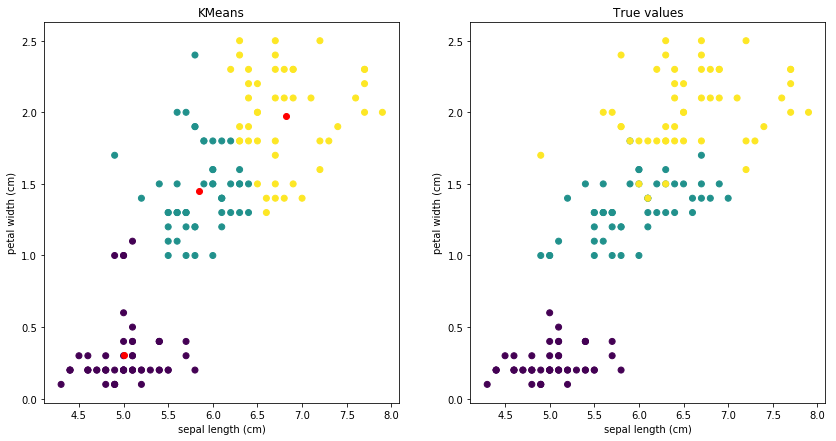

In [11]:
iris = datasets.load_iris()
irisData = np.array(iris.data).T
R, m = KMeans(3, irisData[[0,3],:])
print(R)
plt.figure(figsize=(14, 7))
plt.subplot(121)
plt.scatter(irisData[0,:], irisData[3,:],c=m)
plt.scatter(R[0,:],R[1,:], c = 'red')

plt.title("KMeans")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[3])
# plt.show()
plt.subplot(122)

plt.scatter(irisData[0,:],irisData[3,:],c=iris.target)
plt.title("True values")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[3])
plt.show()

# z1

In [36]:
def generateData(N,d,K,p,mi,Sigma):
    A = np.linalg.cholesky(Sigma.T).T
    distributions = np.random.choice(np.arange(0,K), N, p=p)
    X = np.random.randn(d,N)
    for i in range(N):
        X[:,i] = mi[:,distributions[i]] + np.dot(A[:,:,distributions[i]], X[:,i])
    return X, distributions

def plotData_KMeans(N,d,K,p,mi,Sigma):
    X, groups = generateData(N,d,K,p,mi,Sigma)
    plt.figure(figsize=(15,5))
    plt.subplot(121)
    plt.scatter(X[0,:], X[1,:], marker='.', c=groups)
    plt.subplot(122)
    R, m = KMeans(K, X)
    plt.scatter(X[0,:], X[1,:], marker='.', c=m)
    plt.scatter(R[0,:], R[1,:], c='red')

N = 5000

## a)

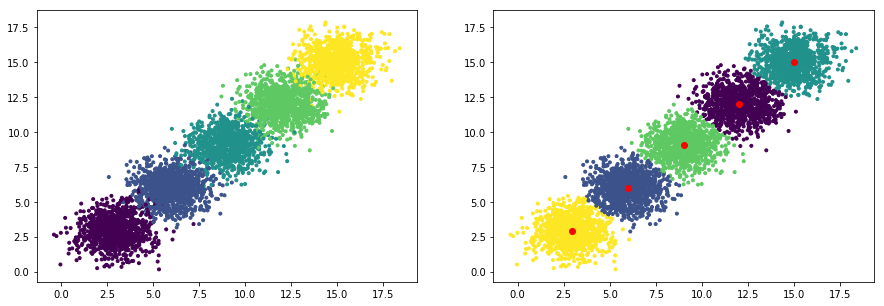

In [37]:
d = 2
K = 5
p = 1/K * np.ones(K)
mi = 3 * np.ones((d,1)) * np.arange(1,K+1)
Sigma = np.array([np.eye(d) for i in range(K)]).T

plotData_KMeans(N,d,K,p,mi,Sigma)


## b)

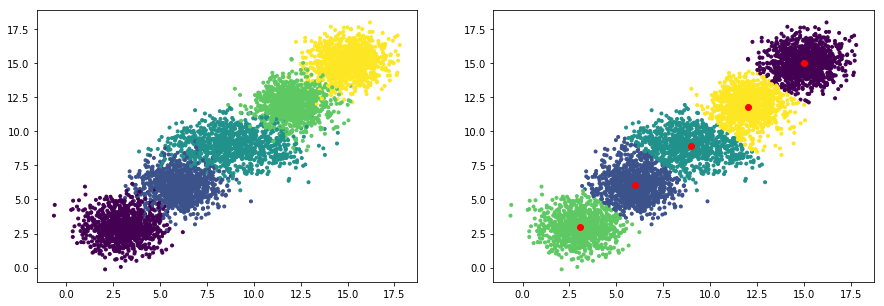

In [38]:
Sigma[:,:,2] = np.array([[3,0],[0, 1]])

plotData_KMeans(N,d,K,p,mi,Sigma)

## c)

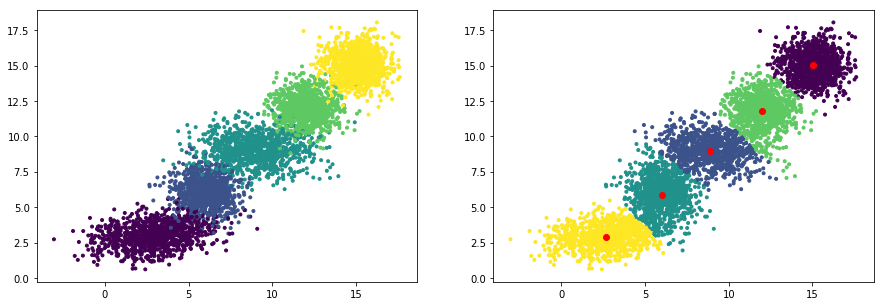

In [39]:
Sigma[:,:,0] = np.array([[3,1],[1,1]])
plotData_KMeans(N,d,K,p,mi,Sigma)

## d)

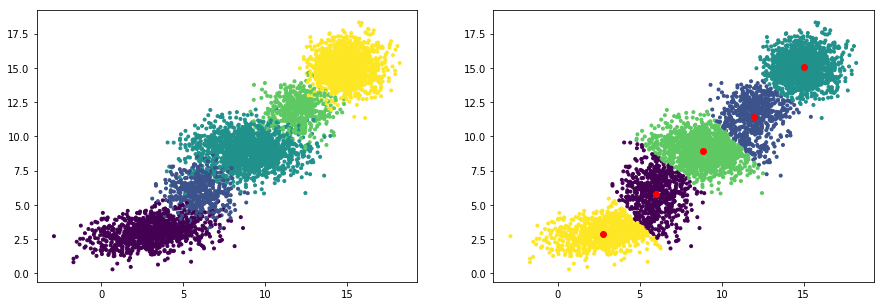

In [42]:
p = np.array([0.2, 0.1, 0.3, 0.1, 0.3])
plotData_KMeans(N,d,K,p,mi,Sigma)

## e)

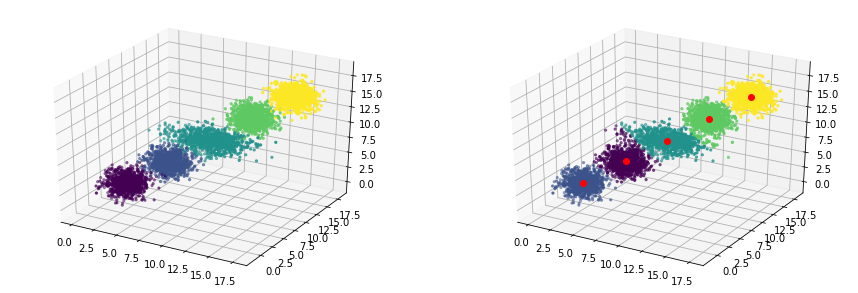

In [54]:
d = 3
K = 5
p = 1/K * np.ones(K)
mi = 3 * np.ones((d,1)) * np.arange(1,K+1)
Sigma = np.array([np.eye(d) for i in range(K)]).T
Sigma[:,:,2] = np.array([[3,1,0],[1,1,0], [0,0,1]]) 

X, groups = generateData(N,d,K,p,mi,Sigma)
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(121, projection='3d')
ax.scatter3D(X[0,:], X[1,:], X[2,:], marker='.', c=groups)
ax2 = fig.add_subplot(122, projection='3d')
R, m = KMeans(K, X)
ax2.scatter3D(X[0,:], X[1,:], X[2,:], marker='.', c=m)
ax2.plot3D(R[0,:],R[1,:],R[2,:],'ko', c='red')

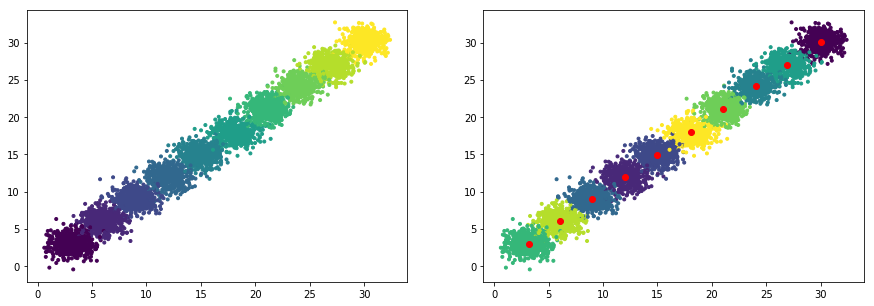

In [60]:
d = 100
K = 10
p = 1/K * np.ones(K)
mi = 3 * np.ones((d,1)) * np.arange(1,K+1)
Sigma = np.array([np.eye(d) for i in range(K)]).T

plotData_KMeans(N,d,K,p,mi,Sigma)

# z3

In [ ]:
irisTypes={b'Iris-setosa':0, b'Iris-versicolor': 1, b'Iris-virginica': 2}
irisData = np.loadtxt("datasets/Iris/data", delimiter=',', converters = {4: lambda x: irisTypes[x]})
irisLabel = open("datasets/Iris/index").read().split('\n')
print(irisData.shape)
irisLabel

wineData = np.loadtxt("datasets/Wine/data", delimiter=',')
wineLabel = open("datasets/Wine/index").read().split('\n')
wineData
wineLabel

cancerData = np.loadtxt("datasets/Cancer/data", delimiter=',', converters = {6: lambda x: -1 if x==b'?' else x})
cancerLabel = open("datasets/Cancer/index").read().split('\n')
cancerData
cancerLabel

forestValues = {b'apr':4, b'aug':8, b'dec':12, b'feb':2, b'fri':5, b'jan':1, b'jul':7, b'jun':6, b'mar':3, b'may':5, b'mon':1, b'nov':11, b'oct':10, b'sat':6, b'sep':9, b'sun':7, b'thu':4, b'tue':2, b'wed':3}
forrF = lambda x: forestValues[x]
forestData = np.loadtxt("datasets/Forest/data", delimiter=',', converters = {2:forrF, 3: forrF})
forestLabel = open("datasets/Forest/index").read().split('\n')
forestData
forestLabel

abaloneSex = {b'M': 0, b'F':1, b'I':2}
abaloneData = np.loadtxt("datasets/Abalone/data", delimiter=',', converters = {0: lambda x: abaloneSex[x]})
abaloneLabel = open("datasets/Abalone/index").read().split('\n')
abaloneData.shape
# abaloneLabel

In [ ]:
def plotData(data, dataClass, dataLabels, name=''):
    size = data.shape[1]
    f, axarr = plt.subplots(size, size)
    for y in range(0, size):
        for x in range(0, size):
            if(x != y):
                axarr[x][y].scatter(data[:, x], data[:, y], c= dataClass)
                
    for x in range(0, size):
        axarr[x][x].hist(data[:, x], normed=None, histtype='bar',
                         facecolor='blue', alpha=0.75, ec='black')
        axarr[size-1][x].set_xlabel(dataLabels[x])
        axarr[x][0].set_ylabel(dataLabels[x])

    # Get current size
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 40
    fig_size[1] = 40
    plt.rcParams["figure.figsize"] = fig_size
    f.suptitle(name, fontsize=50)
    if name != '':
        f.savefig(name+'.png')
    plt.show()


In [ ]:
def plotDataKM(data, dataClass, dataLabels, name='', groups=3):
    size = data.shape[1]
    f, axarr = plt.subplots(size, 2*size)
    for y in range(0, size):
        for x in range(0, size):
            if(x != y):
                axarr[x][y].scatter(data[:, x], data[:, y], c= dataClass)
                
                R, m = KMeans(groups, data.T[[x,y],:])
                axarr[x][y+size].scatter(data[:, x], data[:, y], c= m)
                axarr[x][y+size].scatter(R[0,:],R[1,:], c = 'red')
                
    for x in range(0, size):
        axarr[x][x].hist(data[:, x], normed=None, histtype='bar',
                         facecolor='blue', alpha=0.75, ec='black')
        
        axarr[x][x+size].hist(data[:, x], normed=None, histtype='bar',
                              facecolor='blue', alpha=0.75, ec='black')
        
        axarr[size-1][x].set_xlabel(dataLabels[x])
        axarr[x][0].set_ylabel(dataLabels[x])
        axarr[size-1][x+size].set_xlabel(dataLabels[x])


    # Get current size
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 40
    fig_size[1] = 80
    plt.rcParams["figure.figsize"] = fig_size
    f.suptitle(name, fontsize=50)
    if name != '':
        f.savefig(name+'-KM.png')
    plt.show()


In [ ]:
plotData(irisData[:,:4], irisData[:, 4], irisLabel, 'Iris')
plotData(wineData[:,1:13], wineData[:, 0], wineLabel[1:], 'Wine')
plotData(forestData[:,:13], np.zeros(517), forestLabel, 'Forest')
plotData(cancerData[:,1:10], cancerData[:, 10], cancerLabel[1:], 'Cancer')
plotData(abaloneData[:,:8], abaloneData[:, 8], abaloneLabel, 'Abalone')

In [ ]:
plotDataKM(irisData[:,:4], irisData[:, 4], irisLabel, 'Iris')
plotDataKM(wineData[:,1:13], wineData[:, 0], wineLabel[1:], 'Wine', )
plotDataKM(forestData[:,:13], np.zeros(517), forestLabel, 'Forest')
plotDataKM(cancerData[:,1:10], cancerData[:, 10], cancerLabel[1:], 'Cancer', 2)
plotDataKM(abaloneData[:,1:8], abaloneData[:, 8], abaloneLabel[1:], 'Abalone', 29)

# z4

In [6]:
#some magicto show the images inside the notebook
%pylab inline
%matplotlib inline

import matplotlib.pyplot as plt
from scipy import ndimage
import numpy as np
from scipy import signal

# A hepler function for displaying images within the notebook.
# It displays an image, optionally applies zoom the image.
def show_image(img, zoom=1.5):
    dpi = 77
    plt.figure(figsize=(img.shape[0]*zoom/dpi,img.shape[0]*zoom/dpi))
    if len(img.shape) == 2:
        img = np.repeat(img[:,:,np.newaxis],3,2)        
    plt.imshow(img, interpolation='nearest')
    

# A hepler function for displaying images within the notebook.
# It may display multiple images side by side, optionally apply gamma transform, and zoom the image.
def show_images(imglist, zoom=1, needs_encoding=False):
    if type(imglist) is not list:
       imglist = [imglist]
    n = len(imglist)
    first_img = imglist[0]
    dpi = 77 # pyplot default?
    plt.figure(figsize=(first_img.shape[0]*zoom*n/dpi,first_img.shape[0]*zoom*n/dpi))
    for i in range(0,n):
        img = imglist[i]
        plt.subplot(1,n,i + 1)
        plt.tight_layout()    
        plt.axis('off')
        if len(img.shape) == 2:
           img = np.repeat(img[:,:,np.newaxis],3,2)
        plt.imshow(img, interpolation='nearest')    
    


Populating the interactive namespace from numpy and matplotlib


In [110]:
pic = "pics/1.jpg"
K=50
img=ndimage.imread(pic)
# img = img[::7, ::7, :]
y, x, _ = img.shape
img = img.reshape(x*y, 3)
R, m = KMeans(K, img.T)

/home/michal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


(600, 1000, 3)


/home/michal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  import sys


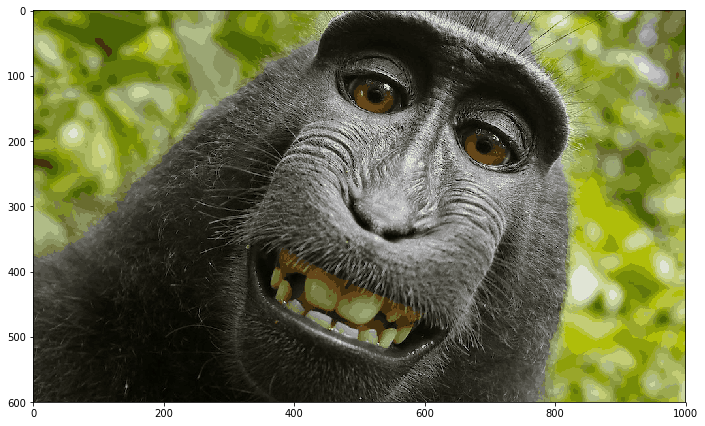

In [112]:
M = np.take(np.eye(K), m, axis=0).astype(int)
# print(M @R.T)
img2 = (M @R.T).astype('int').reshape(y, x, 3)
print(img2.shape)
show_image(img2)
scipy.misc.imsave('1.jpg', img2)

/home/michal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  after removing the cwd from sys.path.
/home/michal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  # This is added back by InteractiveShellApp.init_path()
/home/michal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  app.launch_new_instance()
/home/michal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


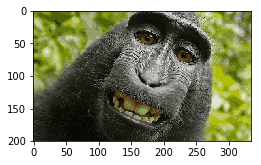

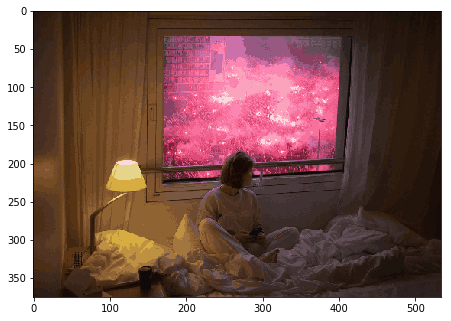

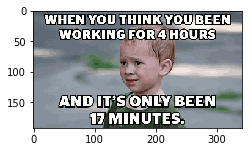

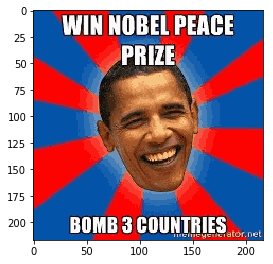

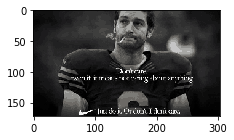

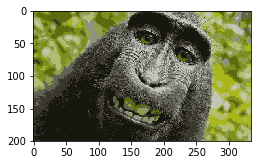

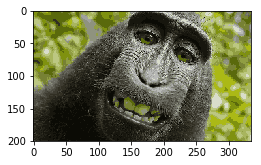

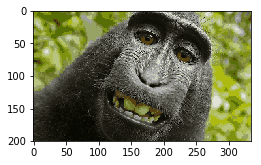

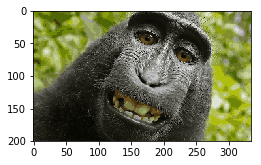

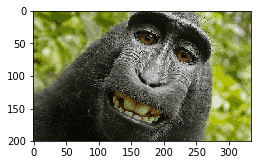

In [5]:
for i in range(1,6):
    pic = f"pics/original/{i}.jpg"
    K=50
    img=ndimage.imread(pic)[::3,::3,:]
    y, x, _ = img.shape
    img = img.reshape(x*y, 3)
    R, m = KMeans(K, img.T)
    M = np.take(np.eye(K), m, axis=0).astype(int)
    img2 = (M @R.T).astype('int').reshape(y, x, 3)
    show_image(img2)
    scipy.misc.imsave(f'pics/results/{i}.jpg', img2)
    
for i in range(10, 60, 10):
    pic = f"pics/original/1.jpg"
    K=i
    img=ndimage.imread(pic)[::3,::3,:]
    y, x, _ = img.shape
    img = img.reshape(x*y, 3)
    R, m = KMeans(K, img.T)
    M = np.take(np.eye(K), m, axis=0).astype(int)
    img2 = (M @R.T).astype('int').reshape(y, x, 3)
    show_image(img2)
    scipy.misc.imsave(f'pics/results/1-{i}.jpg', img2)